<a href="https://colab.research.google.com/github/srishtidubey77/Insurance-Cost-Prediction/blob/main/InsuranceCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Insurance Cost Prediction**


##*Problem Statement*

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.


In [3]:
#importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("insurance.csv")

In [5]:
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# Basic Characteristic and Structure of the data set -

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
df.shape #shape of the dataset

(986, 11)

In [8]:
#Checking missing values
df.isnull().sum()


,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


- There are no null values in this data set.

In [9]:
df.dtypes #data types

,0
Age,int64
Diabetes,int64
BloodPressureProblems,int64
AnyTransplants,int64
AnyChronicDiseases,int64
Height,int64
Weight,int64
KnownAllergies,int64
HistoryOfCancerInFamily,int64
NumberOfMajorSurgeries,int64


In [10]:
#checking the number of unique values
df.nunique().sort_values()

,0
Diabetes,2
BloodPressureProblems,2
AnyTransplants,2
AnyChronicDiseases,2
KnownAllergies,2
HistoryOfCancerInFamily,2
NumberOfMajorSurgeries,4
PremiumPrice,24
Height,44
Age,49


In [11]:
#statistical summary
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [12]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
#correlation
correlation_matrix=df.corr()
correlation_matrix

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


In [14]:
#which column affect most premium price
df.corr()["PremiumPrice"].sort_values(ascending=False)

,PremiumPrice
PremiumPrice,1.000000
Age,0.697540
AnyTransplants,0.289056
NumberOfMajorSurgeries,0.264250
AnyChronicDiseases,0.208610
BloodPressureProblems,0.167097
Weight,0.141507
HistoryOfCancerInFamily,0.083139
Diabetes,0.076209
Height,0.026910


## EDA(Exploratory Data Analysis)

---

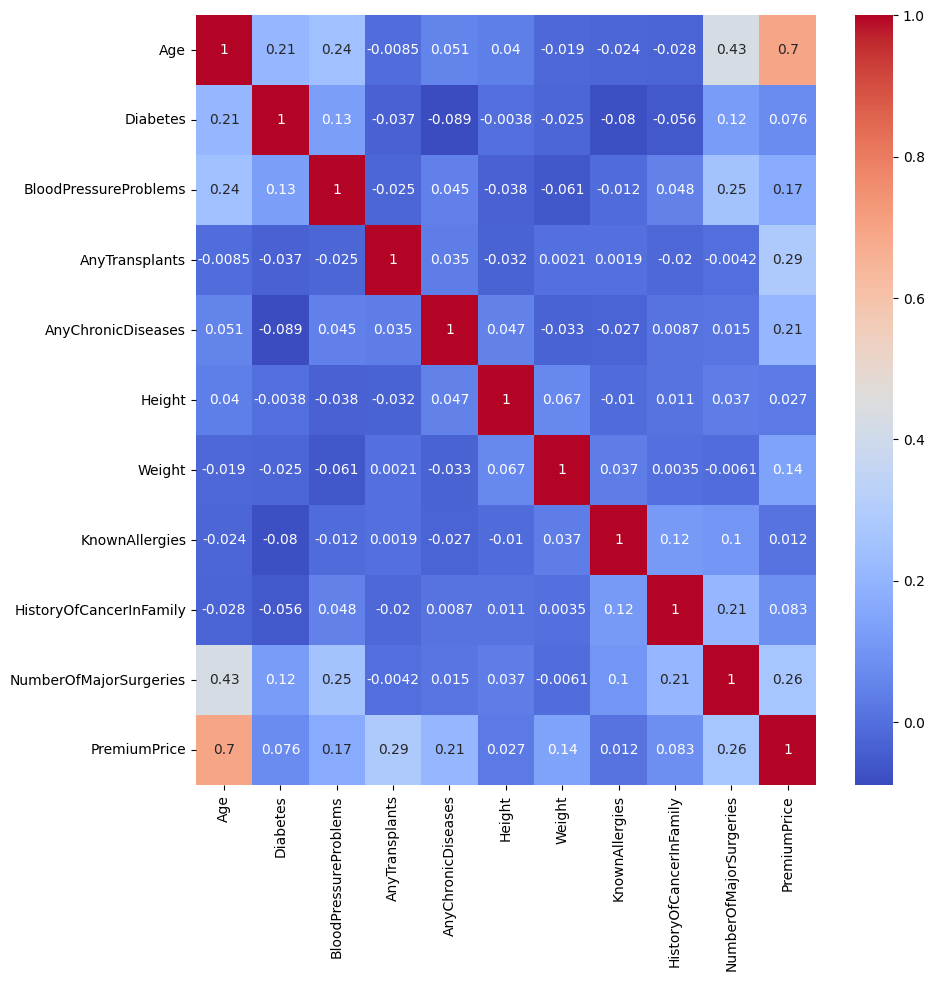

In [15]:
#visualizing correlation on heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

* Most influenced features - Age,Transplants,Surgeries,Family cancer history.
* Moderate influenced features:- Blood Presure problems.
* Least influenced features:- Height,Diabetes,Weight,Allergies.

#Univariate Analysis -

---



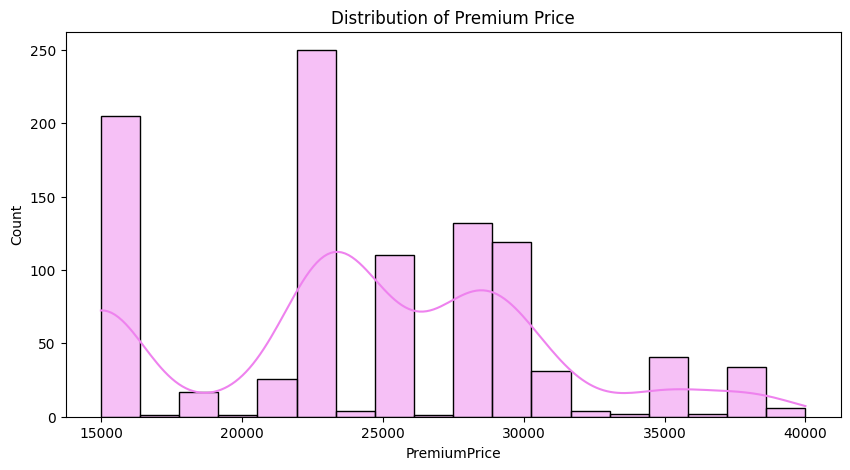

In [16]:
#distribution of premium price
plt.figure(figsize=(10,5))
sns.histplot(df['PremiumPrice'],kde=True,color="violet")
plt.title('Distribution of Premium Price')
plt.show()


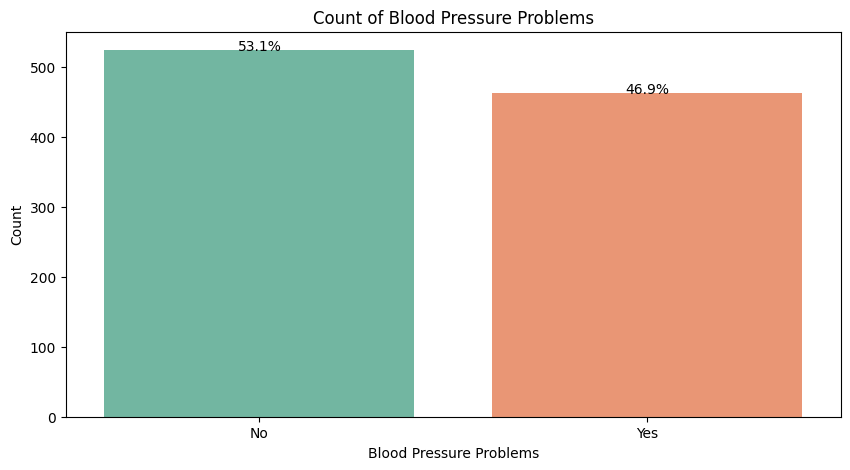

In [17]:

#countplot and percentage for blood pressure problems
plt.figure(figsize=(10,5))
bp=sns.countplot(x='BloodPressureProblems',data=df,palette="Set2")
#percentage
total=len(df['BloodPressureProblems'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Blood Pressure Problems')
plt.xlabel('Blood Pressure Problems')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()


* 46.9 percent people had blood pressure problems.

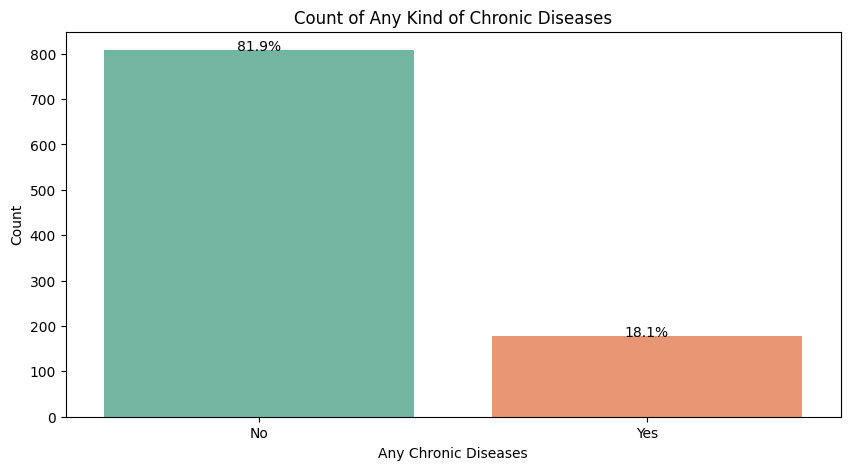

In [18]:

#countplot and percentage for Any Chronic Disease
plt.figure(figsize=(10,5))
bp=sns.countplot(x='AnyChronicDiseases',data=df,palette="Set2")
#percentage
total=len(df['AnyChronicDiseases'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Any Kind of Chronic Diseases')
plt.xlabel('Any Chronic Diseases')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

18.1 percent people had  chronic disease.

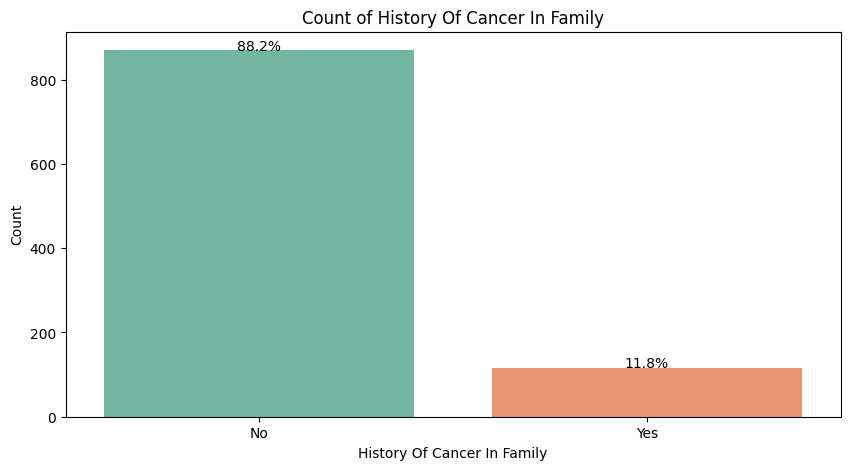

In [19]:

#countplot and percentage for History Of Cancer in the family
plt.figure(figsize=(10,5))
bp=sns.countplot(x='HistoryOfCancerInFamily',data=df,palette="Set2")
#percentage
total=len(df['HistoryOfCancerInFamily'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of History Of Cancer In Family')
plt.xlabel('History Of Cancer In Family')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

* 11.8 percent had cancer history.

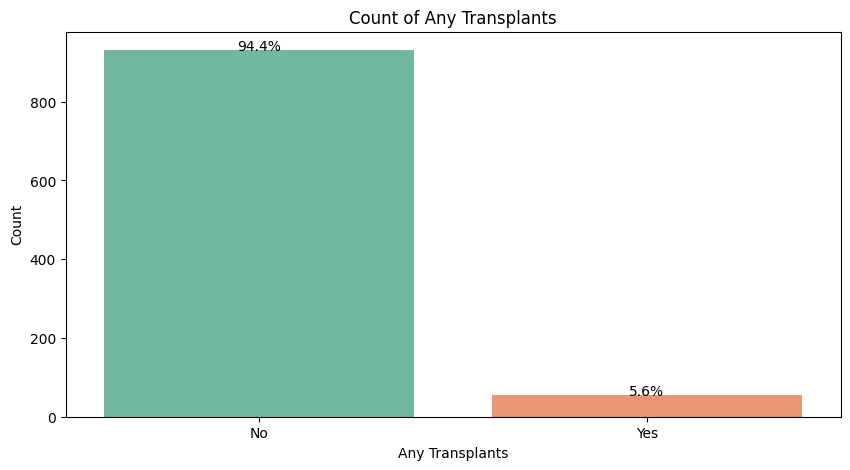

In [20]:

#countplot and percentage for Any Transplants
plt.figure(figsize=(10,5))
bp=sns.countplot(x='AnyTransplants',data=df,palette="Set2")
#percentage
total=len(df['AnyTransplants'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Any Transplants')
plt.xlabel('Any Transplants')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

* 5.6 percent had Any transplants.

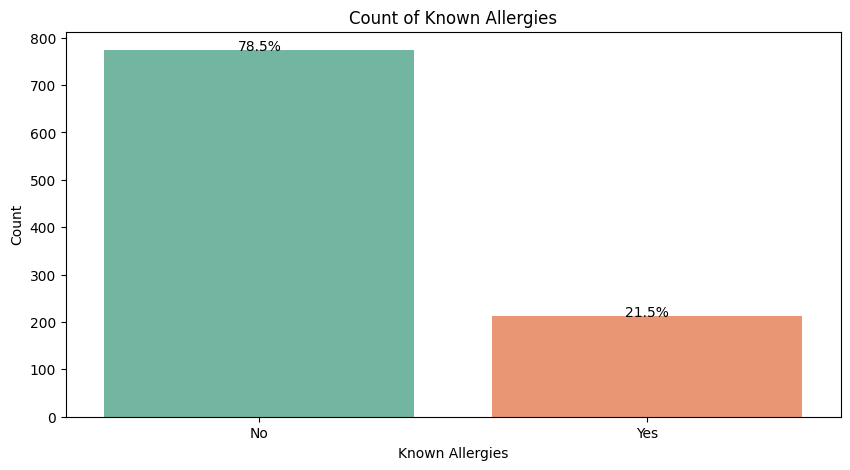

In [21]:

#countplot and percentage for Known Allergies
plt.figure(figsize=(10,5))
bp=sns.countplot(x='KnownAllergies',data=df,palette="Set2")
#percentage
total=len(df['KnownAllergies'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Known Allergies')
plt.xlabel('Known Allergies')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

21.5 percent people had allergies.

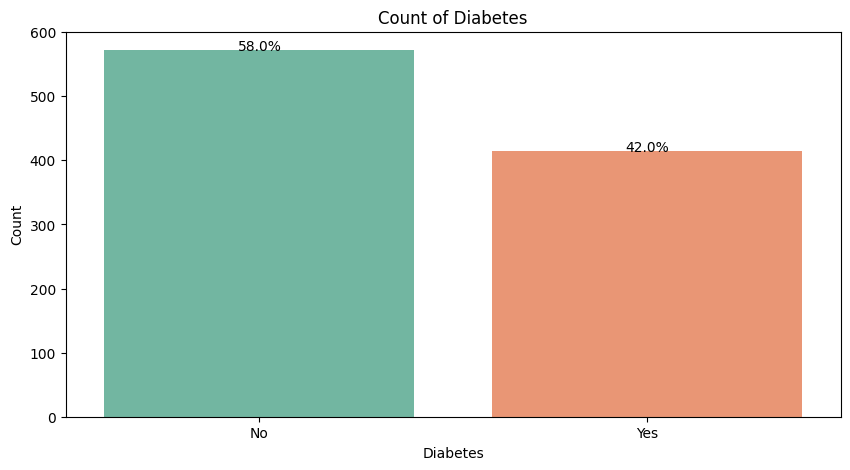

In [22]:

#countplot and percentage for Diabetes
plt.figure(figsize=(10,5))
bp=sns.countplot(x='Diabetes',data=df,palette="Set2")
#percentage
total=len(df['Diabetes'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Diabetes')
plt.xlabel('Diabetes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

* 42 percent people had diabetes

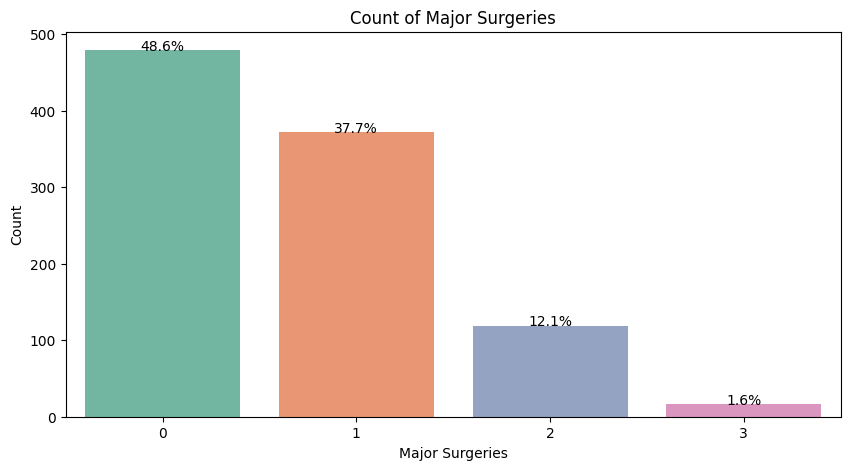

In [23]:

#countplot and percentage for MajorSurgeries
plt.figure(figsize=(10,5))
bp=sns.countplot(x='NumberOfMajorSurgeries',data=df,palette="Set2")
#percentage
total=len(df['NumberOfMajorSurgeries'])
for p in bp.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    bp.annotate(percentage,(x,y),ha='center')

plt.title('Count of Major Surgeries')
plt.xlabel('Major Surgeries')
plt.ylabel('Count')
plt.show()

* According to this data 48.6 percent people had no major surgeries.
* 37.7 percent people had 1 surgeries.
* 12.1 percent people had 2 surgeries .
* 1.6 percent people had 3 surgeries.

#Bivariate Analysis -

---



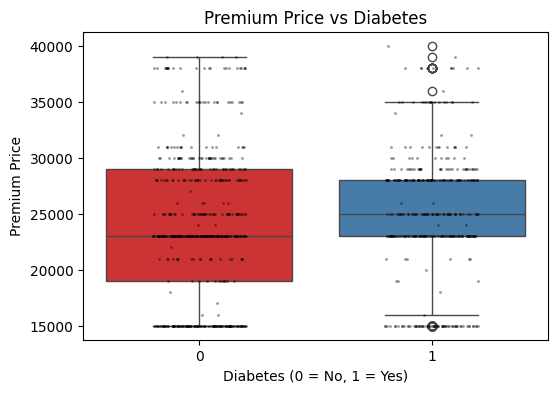

In [24]:
#premium price vs disease
#sns.boxplot(x='Diabetes',y='PremiumPrice',data=df)
#plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df, palette="Set1")
sns.stripplot(x='Diabetes', y='PremiumPrice', data=df,
              color="black", size=2, jitter=0.2, alpha=0.4)  # adds points
plt.title("Premium Price vs Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()


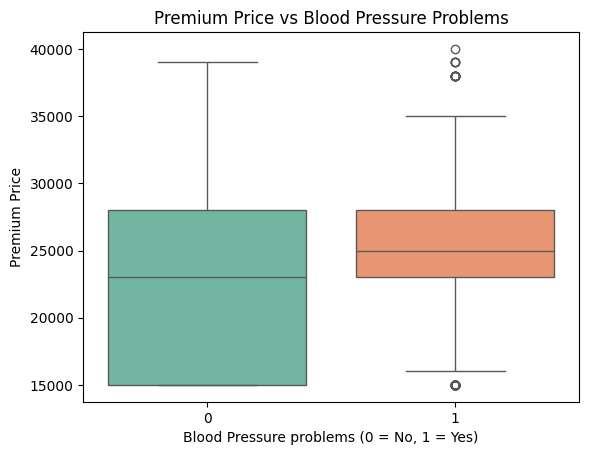

In [25]:
sns.boxplot(x='BloodPressureProblems',y='PremiumPrice',data=df,palette="Set2")
plt.title("Premium Price vs Blood Pressure Problems")
plt.xlabel("Blood Pressure problems (0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()


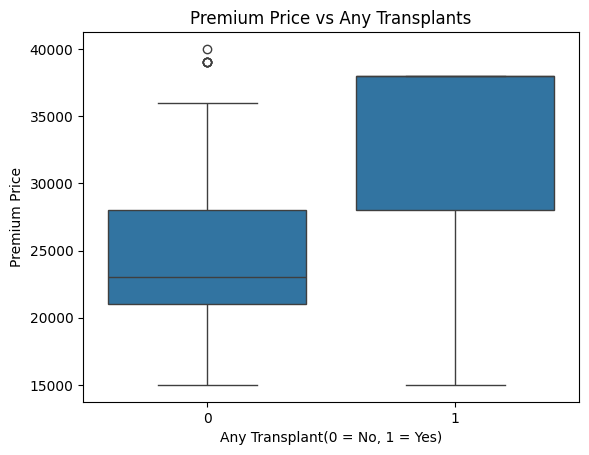

In [26]:
sns.boxplot(x='AnyTransplants',y='PremiumPrice',data=df)
plt.title("Premium Price vs Any Transplants")
plt.xlabel("Any Transplant(0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()

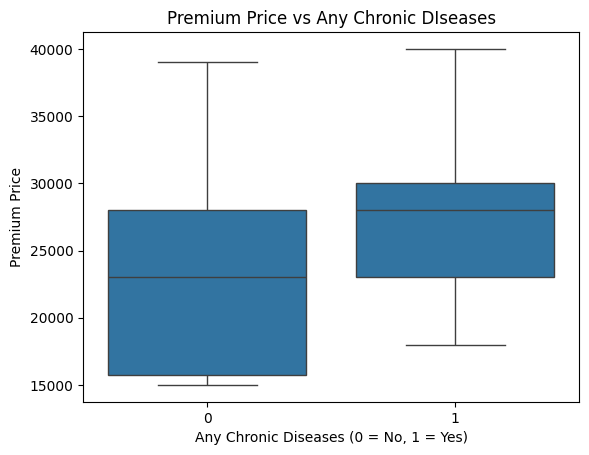

In [27]:
sns.boxplot(x='AnyChronicDiseases',y='PremiumPrice',data=df)
plt.title("Premium Price vs Any Chronic DIseases")
plt.xlabel("Any Chronic Diseases (0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()

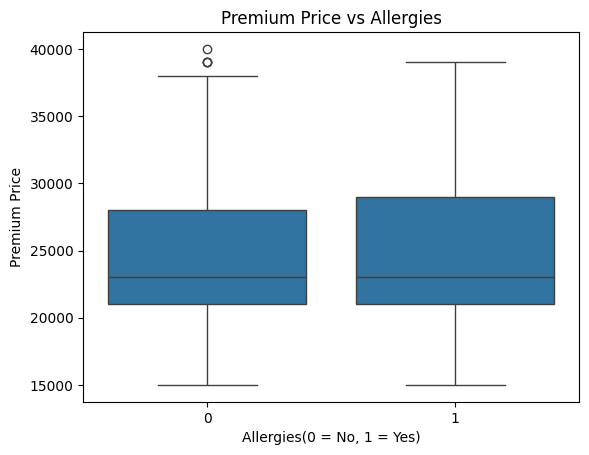

In [28]:
sns.boxplot(x='KnownAllergies',y='PremiumPrice',data=df)
plt.title("Premium Price vs Allergies")
plt.xlabel("Allergies(0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()

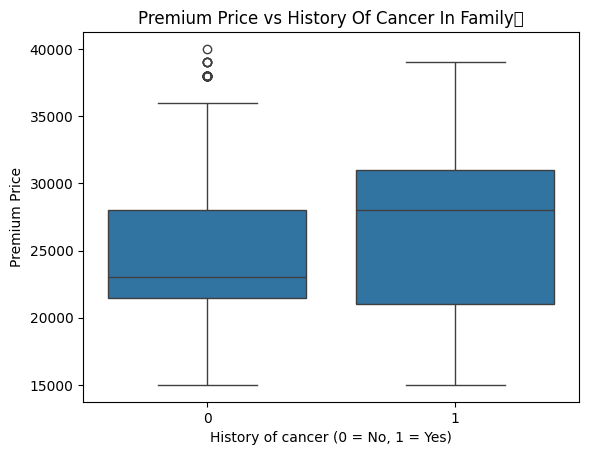

In [29]:
sns.boxplot(x='HistoryOfCancerInFamily',y='PremiumPrice',data=df)
plt.title("Premium Price vs History Of Cancer In Family👪")
plt.xlabel("History of cancer (0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()

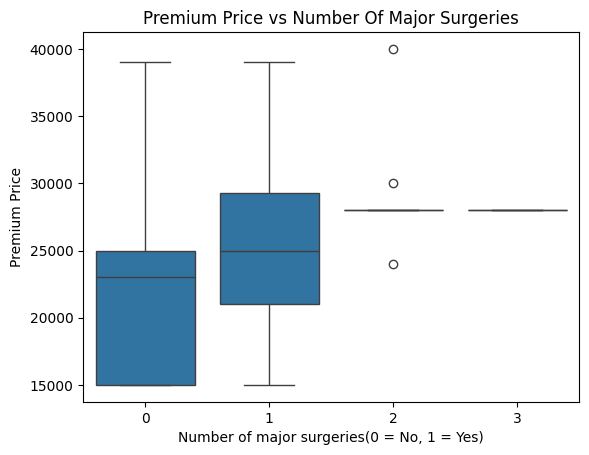

In [30]:
sns.boxplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data=df)
plt.title("Premium Price vs Number Of Major Surgeries")
plt.xlabel("Number of major surgeries(0 = No, 1 = Yes)")
plt.ylabel("Premium Price")
plt.show()

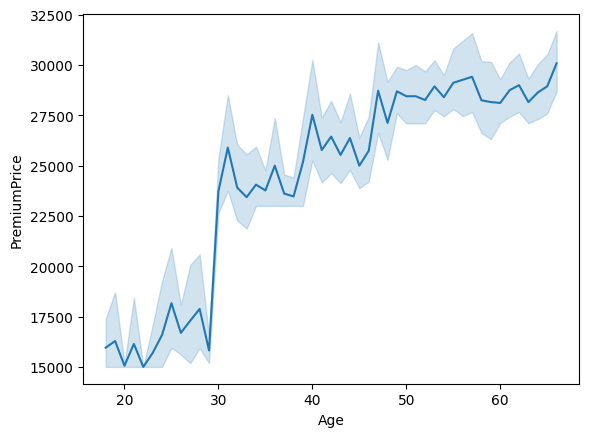

In [31]:
#for age
sns.lineplot(x='Age',y='PremiumPrice',data=df)
plt.show()

# Hypothesis Testing -

---





Age vs Premium Amount Test-

H0(Null Hyposthesis)- There is significant effect of age on the premium price

H1(Alternative Hypothesis)- Age has a significant effect on the insurance charges.

In [32]:
import scipy.stats as stats
x=df['Age']
y=df['PremiumPrice']

#pearson correlation test
corr, p_value=stats.pearsonr(x,y)
print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.6975399655058029
P-value: 1.322507157832154e-144


* Pearson correlation coefficient is 0.698 and it is closer to 1 so it is showing moderatly strong positive correlation.

* P-value is 3.0855900297751696e-145 which is close to 0 so it will reject the null hypothesis.


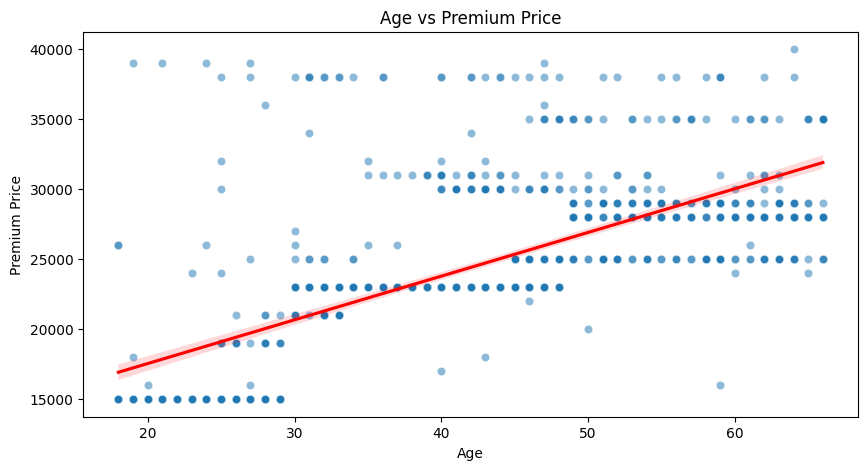

In [33]:
#visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age',y='PremiumPrice',data=df,alpha=0.5)
sns.regplot(x='Age',y='PremiumPrice',data=df,color='red',scatter=False)
plt.title("Age vs Premium Price")
plt.xlabel("Age")
plt.ylabel("Premium Price")
plt.show()

* By the graph we can see here premium price is increasing when age is increasing. It means they strongly correlated to each other.



#Feature Engineering -

---



In [34]:
# Calculate BMI
df['BMI'] = df['Weight'] / ( (df['Height']/100) ** 2 )


In [35]:
df["BMI"]

,BMI
0,23.725286
1,22.530864
2,23.634033
3,27.770313
4,31.934969
...,...
981,23.458562
982,29.903029
983,29.552549
984,29.242109


In [36]:
# BMI categories
df['BMI_Category'] = pd.cut(df['BMI'],
                             bins=[0, 18.5, 24.9, 29.9, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [37]:
df["BMI_Category"]

,BMI_Category
0,Normal
1,Normal
2,Normal
3,Overweight
4,Obese
...,...
981,Normal
982,Obese
983,Overweight
984,Overweight


In [38]:
# Age groups
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 18, 35, 50, 65, 100],
                         labels=['<18', '18-35', '36-50', '51-65', '65+'])


In [39]:
df["Age_Group"]

,Age_Group
0,36-50
1,51-65
2,36-50
3,51-65
4,36-50
...,...
981,<18
982,51-65
983,51-65
984,36-50


In [40]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category,Age_Group
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,36-50
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,51-65
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,36-50
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,51-65
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,36-50


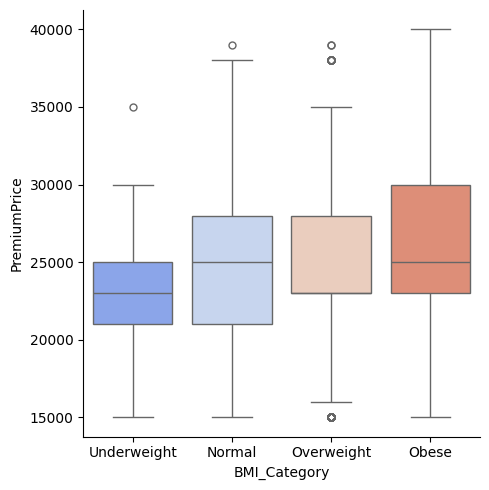

In [41]:
#catplot for bmi category and premium price
sns.catplot(x='BMI_Category', y='PremiumPrice', kind='box', data=df, palette='coolwarm')


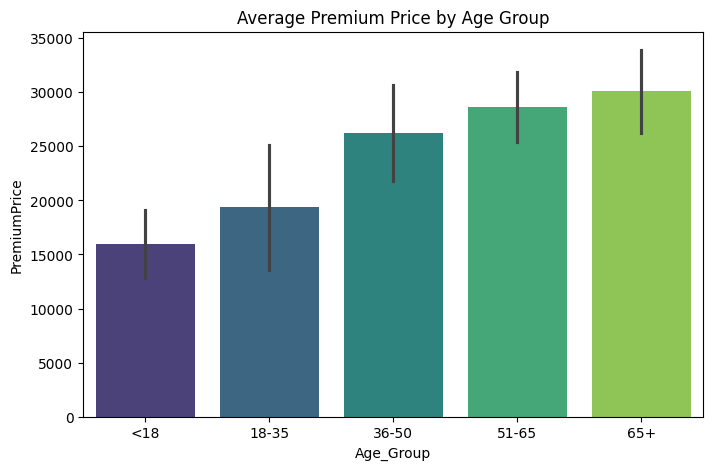

In [42]:
#average premium by age group
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='PremiumPrice', data=df, palette='viridis', ci='sd')
plt.title('Average Premium Price by Age Group')
plt.show()


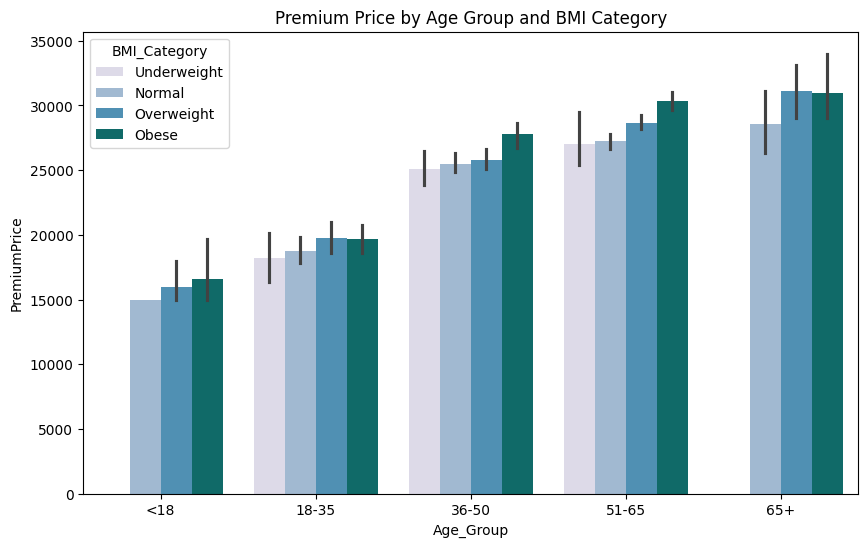

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='PremiumPrice', hue='BMI_Category', data=df, palette='PuBuGn')
plt.title('Premium Price by Age Group and BMI Category')
plt.show()


#Treating Outliers

---



In [44]:
num_cols = ["PremiumPrice", "BMI", "Height", "Weight"]  # continuous variables

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower_cap, upper_cap)
    return df

for col in num_cols:
    df = cap_outliers(df, col)

df[num_cols].describe()


,PremiumPrice,BMI,Height,Weight
count,986.000000,986.000000,986.000000,986.000000
mean,24332.657201,27.391976,168.182556,76.844828
std,6238.686283,5.675721,10.098155,13.930256
min,15000.000000,15.156281,145.000000,51.000000
25%,21000.000000,23.393392,161.000000,67.000000
50%,23000.000000,27.156602,168.000000,75.000000
75%,28000.000000,30.759870,176.000000,87.000000
max,38500.000000,41.809587,188.000000,117.000000


#Test/Train Split

---



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
X = df.drop('PremiumPrice', axis=1)  # features
y = df['PremiumPrice']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Encoding the categorical variables-

---



In [47]:
df.head(20)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category,Age_Group
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,36-50
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,51-65
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,36-50
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,51-65
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,36-50
5,30,0,0,0,0,160,69,1,0,1,23000,26.953125,Overweight,18-35
6,33,0,0,0,0,150,54,0,0,0,21000,24.000000,Normal,18-35
7,23,0,0,0,0,181,79,1,0,0,15000,24.114038,Normal,18-35
8,48,1,0,0,0,169,74,1,0,0,23000,25.909457,Overweight,36-50
9,38,0,0,0,0,182,93,0,0,0,23000,28.076319,Overweight,36-50


In [48]:
df['BMI_Category'].unique()

['Normal', 'Overweight', 'Obese', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [49]:
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping)

In [50]:
df['BMI_Category']

,BMI_Category
0,1
1,1
2,1
3,2
4,3
...,...
981,1
982,3
983,2
984,2


In [51]:
df['BMI_Category'].isna().sum()

np.int64(0)

In [52]:
age_mapping = {'<18': 0,
               '18-35': 1,
               '36-50': 2,
               '51-65': 3,
               '65+': 4}
df['Age_Group'] = df['Age_Group'].map(age_mapping)

In [53]:
df['Age_Group']

,Age_Group
0,2
1,3
2,2
3,3
4,2
...,...
981,0
982,3
983,3
984,2



#Feature Scaling -
---



In [54]:
X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMI_Category,Age_Group
762,19,0,0,0,0,146,55,0,0,0,25.802214,Overweight,18-35
334,31,0,1,0,0,162,87,0,0,0,33.150434,Obese,18-35
890,58,1,0,0,0,147,75,0,0,0,34.707761,Obese,51-65
529,31,0,1,0,0,171,85,0,0,0,29.068773,Overweight,18-35
468,26,1,1,0,0,167,70,0,1,1,25.099502,Overweight,18-35


In [55]:
X_train['BMI_Category']=X_train['BMI_Category'].map(bmi_mapping)
X_test['BMI_Category']=X_test['BMI_Category'].map(bmi_mapping)
X_train['Age_Group']=X_train['Age_Group'].map(age_mapping)
X_test['Age_Group']=X_test['Age_Group'].map(age_mapping)


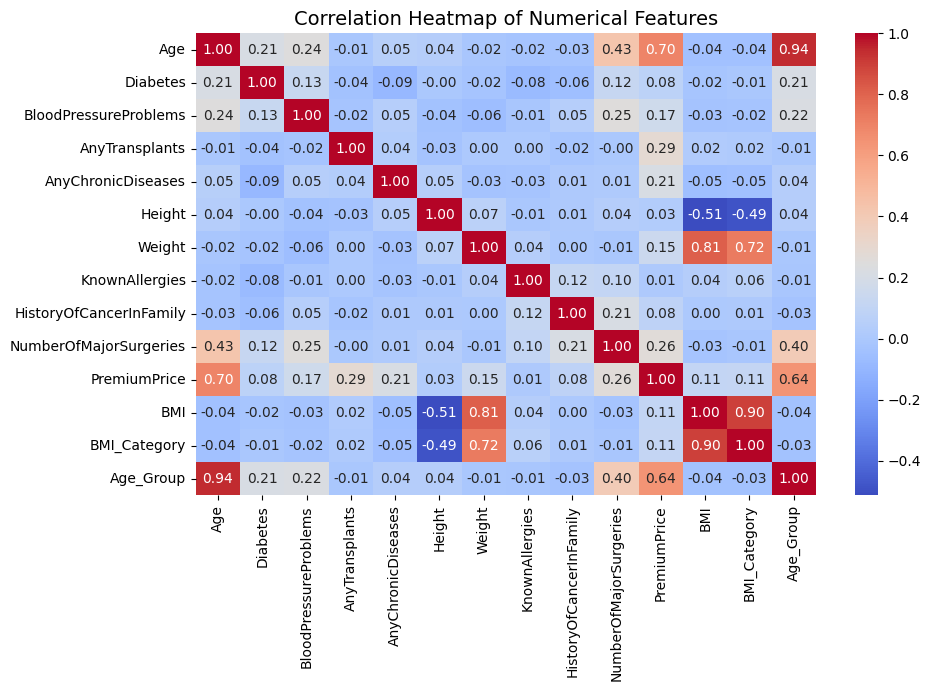

In [56]:
# Computing correlation matrix (numerical columns only)
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

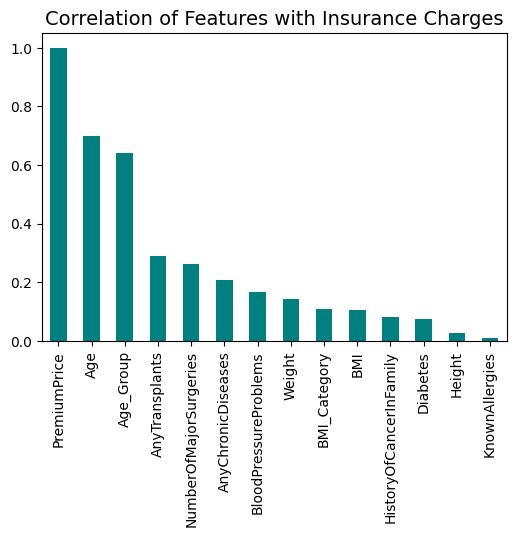

In [57]:
plt.figure(figsize=(6,4))
df.corr()['PremiumPrice'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Correlation of Features with Insurance Charges", fontsize=14)
plt.show()


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training The Model -

---



In [59]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [60]:
#predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 12191961.83
Root Mean Squared Error (RMSE): 3491.70
R-squared (R2): 0.71


In [61]:
#training the model on randomforest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [62]:
#prediction
y_pred = rf_model.predict(X_test_scaled)

In [63]:
#evaluating
mse_rf= mean_squared_error(y_test, y_pred)
rmse_rf= np.sqrt(mse)
r2_rf= r2_score(y_test, y_pred)

In [64]:
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Mean Squared Error (MSE): 4477397.60
Root Mean Squared Error (RMSE): 3491.70
R-squared (R2): 0.90


In [65]:
#xgbregressir model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
#predict
y_pred = xgb_model.predict(X_test_scaled)

In [67]:
#Evaluting
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse)
r2_xgb = r2_score(y_test, y_pred)

In [68]:
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

Mean Squared Error (MSE): 7043595.50
Root Mean Squared Error (RMSE): 3491.70
R-squared (R2): 0.83


In [69]:
#GradientBoostingRegreesor model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [70]:
#predict
y_pred = gb_model.predict(X_test_scaled)

In [71]:
#evaluating
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb= np.sqrt(mse)
r2_gb= r2_score(y_test, y_pred)

In [72]:
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2): {r2_gb:.2f}")

Mean Squared Error (MSE): 5637476.36
Root Mean Squared Error (RMSE): 3491.70
R-squared (R2): 0.87


In [73]:
#models comparision table
results=pd.DataFrame({  "Model" :['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
"MAE" : [mse, mse_rf, mse_xgb, mse_gb],
"RMSE" : [rmse, rmse_rf, rmse_xgb, rmse_gb],
"R^2 SCORE": [r2, r2_rf, r2_xgb, r2_gb]  })


In [74]:
results

,Model,MAE,RMSE,R^2 SCORE
0,Linear Regression,1.219196e+07,3491.69899,0.714091
1,Random Forest,4.477398e+06,3491.69899,0.895002
2,XGBoost,7.043596e+06,3491.69899,0.834823
3,Gradient Boosting,5.637476e+06,3491.69899,0.867798


**Random Forest delivers the most accurate and reliable predictions for our dataset.**

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
rf = RandomForestRegressor(random_state=42)

In [77]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [78]:
#GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', # RMSE as evaluation
    cv=5,                                  # 5-fold cross validation
    n_jobs=-1,                             # use all CPU cores
    verbose=2
)

In [79]:
#Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [80]:
#Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE: 2901.9774267403154


**Hyperparameter tuning using GridSearchCV was performed to systematically search for the optimal combination of model parameters, aiming to improve the Random Forest’s predictive performance while avoiding overfitting.**

In [81]:
best_model = grid_search.best_estimator_


In [82]:
#evaluating data
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = best_model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 4127494.34
Root Mean Squared Error (RMSE): 2031.62
R-squared (R2): 0.90


In [83]:
#checking baseline accuracy
from sklearn.ensemble import RandomForestRegressor # or RandomForestRegressor
from sklearn.metrics import r2_score # Import r2_score

baseline_model = RandomForestRegressor(random_state=42)  # change for regression
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)

print("Baseline R2 Score:", r2_score(y_test, baseline_pred))

Baseline R2 Score: 0.8948340408178647


In [84]:
#feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
0                       Age    0.663199
3            AnyTransplants    0.105267
6                    Weight    0.074828
4        AnyChronicDiseases    0.039131
10                      BMI    0.031941
9    NumberOfMajorSurgeries    0.031645
8   HistoryOfCancerInFamily    0.022426
5                    Height    0.017485
2     BloodPressureProblems    0.006067
12                Age_Group    0.005710
11             BMI_Category    0.000923
1                  Diabetes    0.000858
7            KnownAllergies    0.000519


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Apply mapping to X before cross-validation
X_encoded = X.copy()
X_encoded['BMI_Category'] = X_encoded['BMI_Category'].map(bmi_mapping)
X_encoded['Age_Group'] = X_encoded['Age_Group'].map(age_mapping)

# Define the model (using the Random Forest model as it performed best)
model_for_cv = RandomForestRegressor(n_estimators=100, random_state=42)


scores = cross_val_score(model_for_cv, X_encoded, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validation R² scores: [0.79481667 0.76561175 0.80701028 0.89550106 0.69484417]
Average R²: 0.7915567867987239


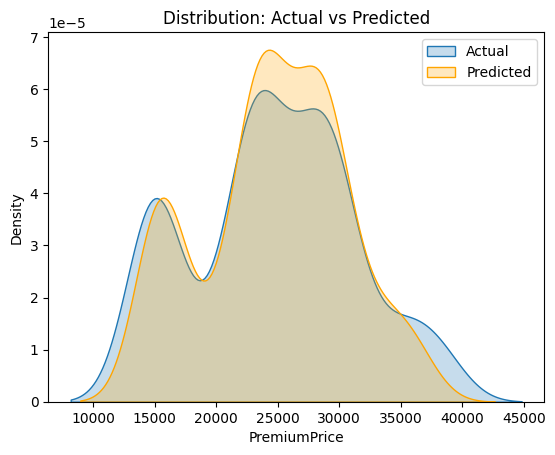

In [86]:
#Actual vs Predicted

sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True, color='orange')
plt.title("Distribution: Actual vs Predicted")
plt.legend()
plt.show()


* Both actual and predicted values have similar shapes and peaks ,means the model is capturing the overall distribution well.
* Close alignment of the two KDE curves suggests the model's predictions are not only close in value but also matching the overall trends of the target variable.

In [87]:
residuals=y_test-y_pred

In [88]:
residuals

,PremiumPrice
613,1275.482328
451,1450.873537
731,-2554.439963
436,-2006.387446
275,-664.063510
...,...
209,189.895272
506,0.000000
49,-1278.533099
717,159.490995


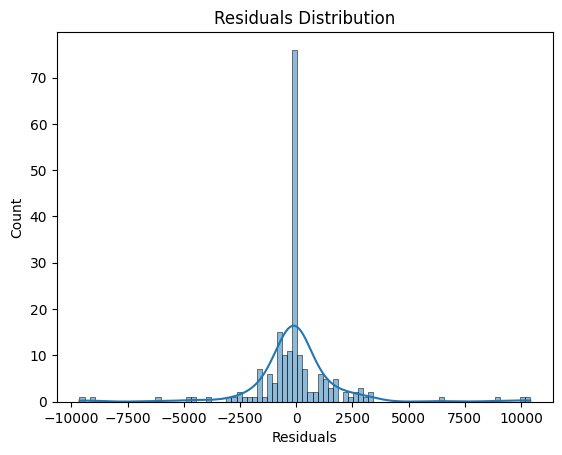

In [89]:
#reseduals plot
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

*Overall prediction errors are small and balanced ,but tail errors suggests there is room for improvement

Text(0, 0.5, 'Feature')

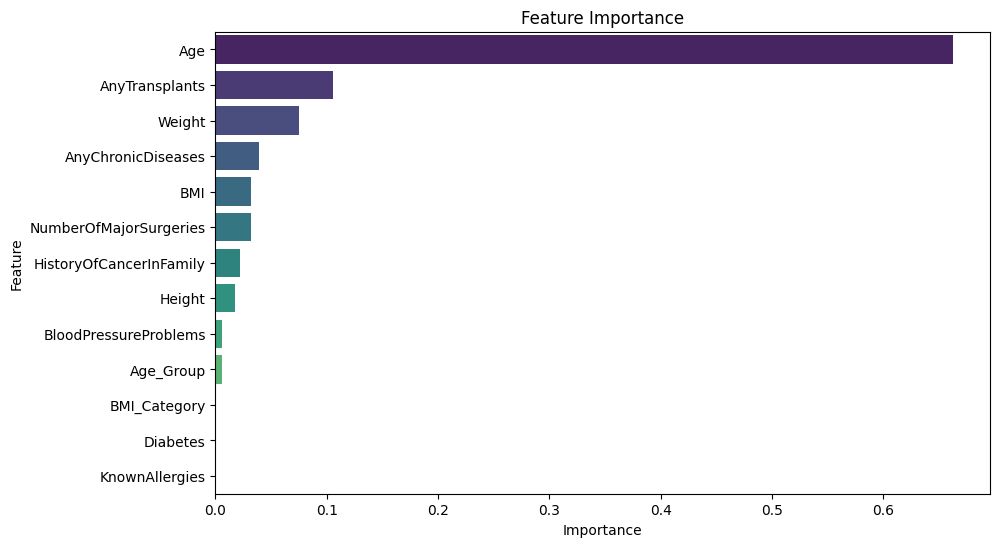

In [90]:
#features importance chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

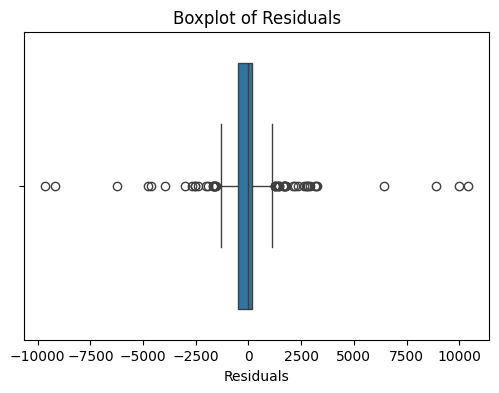

In [91]:
#boxplots of errors
plt.figure(figsize=(6,4))
sns.boxplot(x=residuals)
plt.title("Boxplot of Residuals")
plt.xlabel("Residuals")
plt.show()


In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_encoded, y, cv=5, scoring="neg_root_mean_squared_error")
print(f"CV RMSE: {(-scores).mean():.2f} ± {(-scores).std():.2f}")

CV RMSE: 2751.84 ± 567.20


In [93]:
import pickle

# Saving the trainned model in the form of pickle file
with open("insurance_model.pkl", "wb") as f:
    pickle.dump(best_model, f)



* saved the data as insurance_model.pkl file.

# Insights-